## Binary questions: Feature Selection

The questions posed to GPT were based on a true-false basis. To evaluate which questions are most relevant to explain the ratings, we are most interested in performing the Chi-square test. 

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#import json
import scipy.stats as stats
#import requests 

### Extracting a Dataset containing all questions and splitting into train and test set

In [2]:
f = open('Data/trope_questions.txt', 'r')

line = f.readline()
questions = []

while len(line)!=0:
    questions.append(line.strip())
    line = f.readline()
    
questions = questions[1:-1]

In [3]:
questions

['- Is there a wedding stopped at the altar trope ?',
 '- Is there a best friend to lovers trope ?',
 '- Is there a enemies to lovers trope ?',
 '- Is the romance impossible because of the different social status of the protagonists ?',
 '- Has one of the lovers a serious illness ?',
 '- Is this love at first sight?',
 '- Is there a meet-cute trope ?',
 '- is there a break up ?',
 '- Is there a one night stand ?',
 '- Is one of the main characters initially involved into a different relationship?',
 '- Is there a love triangle ?',
 '- Is the ending sad ?',
 '- Is there a LGBT couple ?',
 '- Is there infidelity ?',
 '- Do they start dating as a bet ?',
 '- Is there a fake dating trope ?',
 '- Is the male protagonist a bad boy ?',
 "- Is the movie linked to a special holliday (christmas, valentine's day...)?",
 '- Is there an empowered woman having regrets ?',
 '- Is there a reunion after a long time spent apart ?']

In [4]:
questions_dict = {'q_'+ str((i)) : questions[i] for i in range(len(questions))}

In [5]:
questions_dict['q_15']

'- Is there a fake dating trope ?'

In [6]:
characters = pd.read_csv('./Data/Preprocessed/preprocessed_characters.tsv', delimiter='\t')
movies_augmented = pd.read_csv('./Data/Preprocessed/movie.metadata.augmented.tsv', delimiter='\t')
romances_with_binary = pd.read_csv('./Data/Preprocessed/romances.with.binary.tsv', delimiter='\t')

In [7]:
romances_with_binary.columns

Index(['index', 'movie_id', 'movie_name', 'revenue', 'runtime', 'languages',
       'countries', 'movie_release', 'genres', 'imdb_id', 'rating', 'nb_votes',
       'binary_answers'],
      dtype='object')

In [8]:
gpt_answers = romances_with_binary[['movie_id', 'binary_answers']].copy()
gpt_answers['response_length'] = gpt_answers['binary_answers'].apply(lambda ans: len(ans))
gpt_answers.head(3)

,movie_id,binary_answers,response_length
0,6631279,01001000000001111000,20
1,21926710,00000001000001000100,20
2,26067101,01000000001000001000,20


In [9]:
def print_length_of_string_occurrences(df, print_incorrect_rows=False):
    for length in df['response_length'].unique():
        print(f'{len(df[df.response_length==length])} row(s) has/have length {length}')
        if print_incorrect_rows and length != 20:
            print(df[df.response_length==length])



In [10]:
print_length_of_string_occurrences(gpt_answers, print_incorrect_rows=False)

5811 row(s) has/have length 20
70 row(s) has/have length 21
1 row(s) has/have length 19


In [11]:
for i in range(20):
    # print(i)
    romances_with_binary['binary_answers'].apply(lambda x: print(len(x)))
    #loaded_romances_with_binary["Q"+str(i + 1)] = loaded_romances_with_binary['binary_answers'].apply(lambda x: x[i])

20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
21
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
21
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
21
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
21
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
21
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
2


20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
21
20
20
21
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
21
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
21
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
21
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20


In [12]:

bits = {'0', '1', '2'}
gpt_answers['binary_answers'] = gpt_answers['binary_answers'].apply(lambda b: ''.join(c for c in b if c in bits))

#recalculate the response length
gpt_answers['response_length'] = gpt_answers['binary_answers'].apply(lambda ans: len(ans))



In [13]:
print_length_of_string_occurrences(gpt_answers, print_incorrect_rows=True)

5881 row(s) has/have length 20
1 row(s) has/have length 19
      movie_id       binary_answers  response_length
1569   2210682  0000000000111100010               19


The columns with incorrect lengths are now replaced with a string of '2's (20 concatenated two's). 

In [14]:
gpt_answers['binary_answers'] = gpt_answers['binary_answers'].apply(lambda b: b if len(b)==20 else '2'*20)

In [15]:
gpt_answers.drop(columns=['response_length'], inplace=True)

Now, after this preprocessing, let's separate the answers to each question in a separate column of the dataframe.


In [16]:
for q_nb, question in enumerate(questions):
    gpt_answers[f'q_{q_nb}'] = gpt_answers['binary_answers'].apply(lambda b: int(b[q_nb]))
    
gpt_answers.head(5)

,movie_id,binary_answers,q_0,q_1,q_2,q_3,q_4,q_5,q_6,q_7,...,q_10,q_11,q_12,q_13,q_14,q_15,q_16,q_17,q_18,q_19
0,6631279,01001000000001111000,0,1,0,0,1,0,0,0,...,0,0,0,1,1,1,1,0,0,0
1,21926710,00000001000001000100,0,0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,1,0,0
2,26067101,01000000001000001000,0,1,0,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0
3,12053509,01000000000111011000,0,1,0,0,0,0,0,0,...,0,1,1,1,0,1,1,0,0,0
4,7028314,00010011010001001000,0,0,0,1,0,0,1,1,...,0,0,0,1,0,0,1,0,0,0


In [17]:
# we remove all the rows where the answer is '2'*20
relevant_answers = gpt_answers[gpt_answers['binary_answers']!='2'*20].copy()

In [18]:
movies_augmented.columns

Index(['movie_id', 'movie_name', 'revenue', 'runtime', 'languages',
       'countries', 'movie_release', 'genres', 'imdb_id', 'rating',
       'nb_votes'],
      dtype='object')

In [19]:
relevant_answers.columns

Index(['movie_id', 'binary_answers', 'q_0', 'q_1', 'q_2', 'q_3', 'q_4', 'q_5',
       'q_6', 'q_7', 'q_8', 'q_9', 'q_10', 'q_11', 'q_12', 'q_13', 'q_14',
       'q_15', 'q_16', 'q_17', 'q_18', 'q_19'],
      dtype='object')

In [20]:
relevant_answers = relevant_answers.merge(movies_augmented[['movie_id','rating']], on='movie_id', how='inner').copy()

In [21]:
relevant_answers.columns

Index(['movie_id', 'binary_answers', 'q_0', 'q_1', 'q_2', 'q_3', 'q_4', 'q_5',
       'q_6', 'q_7', 'q_8', 'q_9', 'q_10', 'q_11', 'q_12', 'q_13', 'q_14',
       'q_15', 'q_16', 'q_17', 'q_18', 'q_19', 'rating'],
      dtype='object')

In [22]:
relevant_answers.drop(columns=['binary_answers'], inplace=True)

In [23]:
relevant_answers

,movie_id,q_0,q_1,q_2,q_3,q_4,q_5,q_6,q_7,q_8,...,q_11,q_12,q_13,q_14,q_15,q_16,q_17,q_18,q_19,rating
0,6631279,0,1,0,0,1,0,0,0,0,...,0,0,1,1,1,1,0,0,0,5.8
1,21926710,0,0,0,0,0,0,0,1,0,...,0,0,1,0,0,0,1,0,0,6.1
2,26067101,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,6.4
3,12053509,0,1,0,0,0,0,0,0,0,...,1,1,1,0,1,1,0,0,0,6.0
4,7028314,0,0,0,1,0,0,1,1,0,...,0,0,1,0,0,1,0,0,0,5.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5768,4037444,0,0,0,1,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,6.1
5769,1191380,0,0,0,0,1,0,0,0,1,...,1,1,0,1,0,0,0,1,0,6.9
5770,54540,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,7.1
5771,1673588,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,6.8


Notes : TODO remove: 

train and testing set splitting 
cross validation 

remove one question at the time -> a library must exist for this!!!
kNN distance measures -> hamming distance for the strings


We first want to split our dataset into a training and into a test set, so we can train our models and test their quality. 

In [24]:
def split_set(data_to_split, ratio=0.8):
    mask = np.random.rand(len(data_to_split)) < ratio
    return [data_to_split[mask].reset_index(drop=True), data_to_split[~mask].reset_index(drop=True)]

In [25]:
training, test = split_set(relevant_answers)

In [26]:
training.columns

Index(['movie_id', 'q_0', 'q_1', 'q_2', 'q_3', 'q_4', 'q_5', 'q_6', 'q_7',
       'q_8', 'q_9', 'q_10', 'q_11', 'q_12', 'q_13', 'q_14', 'q_15', 'q_16',
       'q_17', 'q_18', 'q_19', 'rating'],
      dtype='object')

In case we want to normalize our features so that how often certain features occur, do no influence the final result 

In [27]:
standardize = True

In [28]:

def standardize_questions(df):
    df = df.copy()
    for q in questions_dict.keys():
        df[q] = (df[q]- df[q].mean()) / df[q].std()
    return df


In [29]:

if standardize: 
    training_std = standardize_questions(training)
    test_std = standardize_questions(test)



## Correlation Analysis between questions and ratings

There are several metrics that we can use to calculate the correlation between parameters. 
- Pearson Correlation (in our case: Point-Biserial Correlation as we want to measure the relationship between a continuous variable and a binary value)
- 

In [30]:
questions_dict.keys()

dict_keys(['q_0', 'q_1', 'q_2', 'q_3', 'q_4', 'q_5', 'q_6', 'q_7', 'q_8', 'q_9', 'q_10', 'q_11', 'q_12', 'q_13', 'q_14', 'q_15', 'q_16', 'q_17', 'q_18', 'q_19'])

In [31]:
list(questions_dict)

['q_0',
 'q_1',
 'q_2',
 'q_3',
 'q_4',
 'q_5',
 'q_6',
 'q_7',
 'q_8',
 'q_9',
 'q_10',
 'q_11',
 'q_12',
 'q_13',
 'q_14',
 'q_15',
 'q_16',
 'q_17',
 'q_18',
 'q_19']

In [32]:
"""# Correlation analysis using point-biserial correlation
correlations_point_biserial = relevant_answers[list(questions_dict)].apply(lambda x: stats.pointbiserialr(x, relevant_answers['rating']) if not x.isna() else np.nan)

# Correlation analysis using Pearson correlation
correlations_pearson = relevant_answers.iloc[:, 2:].apply(lambda x: x.corr(relevant_answers['rating']))
# Visualizing correlations with a heatmap
plt.figure(figsize=(12, 8))

plt.subplot(2, 1, 1)
sns.heatmap(correlations_point_biserial.to_frame(), annot=True, cmap='coolwarm', cbar=False)
plt.title('Point-Biserial Correlation')

plt.subplot(2, 1, 2)
sns.heatmap(correlations_pearson.to_frame(), annot=True, cmap='coolwarm', cbar=False)
plt.title('Pearson Correlation')

plt.tight_layout()
plt.show()
"""

"# Correlation analysis using point-biserial correlation\ncorrelations_point_biserial = relevant_answers[list(questions_dict)].apply(lambda x: stats.pointbiserialr(x, relevant_answers['rating']) if not x.isna() else np.nan)\n\n# Correlation analysis using Pearson correlation\ncorrelations_pearson = relevant_answers.iloc[:, 2:].apply(lambda x: x.corr(relevant_answers['rating']))\n# Visualizing correlations with a heatmap\nplt.figure(figsize=(12, 8))\n\nplt.subplot(2, 1, 1)\nsns.heatmap(correlations_point_biserial.to_frame(), annot=True, cmap='coolwarm', cbar=False)\nplt.title('Point-Biserial Correlation')\n\nplt.subplot(2, 1, 2)\nsns.heatmap(correlations_pearson.to_frame(), annot=True, cmap='coolwarm', cbar=False)\nplt.title('Pearson Correlation')\n\nplt.tight_layout()\nplt.show()\n"

In [33]:
dropped_na_relevant_answers = relevant_answers.dropna()

In [34]:
from sklearn.feature_selection import RFECV
from sklearn.linear_model import  LinearRegression   # Choose an appropriate model

# Assuming your DataFrame is named 'df'
X = dropped_na_relevant_answers[list(questions_dict)]
X = dropped_na_relevant_answers.drop(columns=['movie_id', 'rating'])
y = dropped_na_relevant_answers['rating']
model =  LinearRegression()  # Choose an appropriate model
rfe = RFECV(model, step=1, cv=5, scoring='neg_mean_squared_error')
fit = rfe.fit(X, y)
selected_features = X.columns[fit.support_]
feature_importances = fit.estimator_.coef_
score = fit.score(X, y)

In [35]:
selected_features

Index(['q_0', 'q_3', 'q_4', 'q_18', 'q_19'], dtype='object')

In [36]:
feature_importances

array([-0.21268108,  0.11695215,  0.09277932,  0.0922895 ,  0.06336738])

In [37]:
score

0.025090238623337036

In [38]:
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import mean_squared_error, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

In [39]:
training_no_na, test_no_na = split_set(dropped_na_relevant_answers[list(selected_features) + ['rating']])
X_train = training_no_na[list(selected_features)]
X_test = test_no_na[list(selected_features)]
y_train = training_no_na['rating']
y_test = test_no_na['rating']
# Decision Tree
tree_model = DecisionTreeRegressor()
tree_model.fit(X_train, y_train)
tree_predictions = tree_model.predict(X_test)
tree_mse = mean_squared_error(y_test, tree_predictions)
print(f"Decision Tree Mean Squared Error: {tree_mse}")

# Random Forest
rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)
rf_predictions = rf_model.predict(X_test)
rf_mse = mean_squared_error(y_test, rf_predictions)
print(f"Random Forest Mean Squared Error: {rf_mse}")

Decision Tree Mean Squared Error: 0.8641676752555904
Random Forest Mean Squared Error: 0.8641573256846966


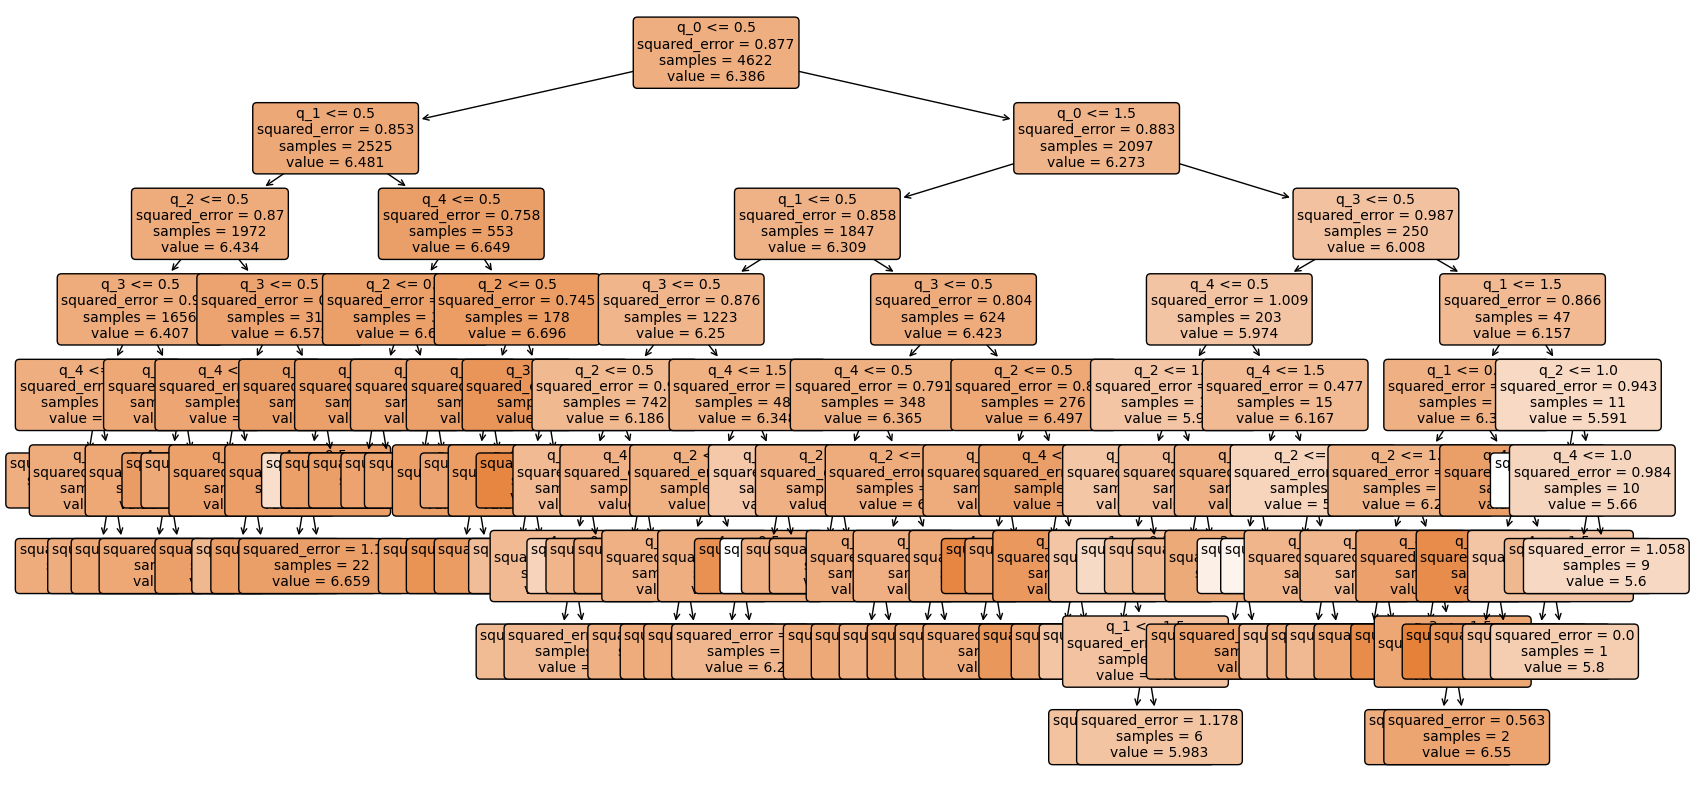

In [40]:
# Visualize the decision tree
plt.figure(figsize=(20, 10))
plot_tree(tree_model, filled=True, feature_names=X.columns, rounded=True, fontsize=10)
plt.show()

In [41]:
from sklearn.ensemble import GradientBoostingRegressor

# Gradient Boosting Regressor
gb_model = GradientBoostingRegressor()
gb_model.fit(X_train, y_train)
gb_predictions = gb_model.predict(X_test)
gb_mse = mean_squared_error(y_test, gb_predictions)
print(f"Gradient Boosting Mean Squared Error: {gb_mse}")

Gradient Boosting Mean Squared Error: 0.8620026589217928


In [42]:
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

# Support Vector Regression
svr_model = make_pipeline(StandardScaler(), SVR())
svr_model.fit(X_train, y_train)
svr_predictions = svr_model.predict(X_test)
svr_mse = mean_squared_error(y_test, svr_predictions)
print(f"SVR Mean Squared Error: {svr_mse}")

SVR Mean Squared Error: 0.8836119460140884


In [43]:
from sklearn.neural_network import MLPRegressor

# Multi-layer Perceptron (MLP)
mlp_model = MLPRegressor(max_iter=1000)  # You can adjust max_iter based on convergence
mlp_model.fit(X_train, y_train)
mlp_predictions = mlp_model.predict(X_test)
mlp_mse = mean_squared_error(y_test, mlp_predictions)
print(f"MLP Mean Squared Error: {mlp_mse}")


MLP Mean Squared Error: 0.8641475857725831
